## Research Topic - Predictive Modeling in Healthcare Delivery: Optimizing the Logistics Strategy for Distribution HIV/AIDS Commodities Across Africa - Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
pd.set_option('display.max_columns', 50)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("cleaned_supply_chain_data.csv")

In [3]:
df.head()

,Unnamed: 0,country,manager,delivery_method,vendor_terms,transport_mode,order_date,expected_date,actual_date,recorded_date,product_category,product_type,supplier,product_feature,product_name,product_brand,dosage,dosage_form,units_per_pack,total_quantity,total_value,pack_price,unit_price,factory_location,priority_status,total_weight,shipping_cost,insurance_cost,delivery_status,order_to_delivery_days,shipping_cost_per_weight,item_quantity(%)
0,18,Vietnam,PMO - US,Direct Drop,EXW,Air,2012-07-25,2012-11-12,2012-11-12,2012-11-12,ARV,Adult,CIPLA LIMITED,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,525,3465.0,6.60,0.11,"Cipla, Goa, India",True,34.0,807.47,4.86,early_delivery,110,23.749118,0.00
1,2682,Kenya,PMO - US,Direct Drop,EXW,Air,2009-11-18,2010-02-16,2010-02-19,2010-02-19,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,150/300mg,Test kit,100,1,80.0,80.00,0.80,Inverness Japan,True,1028.0,10083.69,0.17,delayed,93,9.809037,0.00
2,2683,Vietnam,PMO - US,Direct Drop,EXW,Air,2013-05-03,2014-01-09,2014-01-09,2014-01-09,ARV,Adult,MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,11092,74871.0,6.75,0.11,Mylan (formerly Matrix) Nashik,True,957.0,1869.41,92.62,early_delivery,251,1.953406,0.01
3,2684,Zambia,PMO - US,Direct Drop,EXW,Air,2014-08-19,2015-05-12,2015-05-12,2015-05-14,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,30/50/6mg,Test kit,100,6280,502400.0,80.00,0.80,"Alere Medical Co., Ltd.",True,2548.0,28709.52,516.47,early_delivery,266,11.267473,0.01
4,2685,Haiti,PMO - US,Direct Drop,EXW,Air,2012-01-06,2012-06-12,2012-06-12,2012-06-12,ARV,Pediatric,CIPLA LIMITED,"Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...",Lamivudine/Nevirapine/Stavudine,Generic,30/50/6mg,Chewable/dispersible tablet - FDC,60,298,685.4,2.30,0.04,"Cipla, Goa, India",True,21.0,304.62,0.96,early_delivery,158,14.505714,0.00


In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4772 non-null   object 
 1   manager                   4772 non-null   object 
 2   delivery_method           4772 non-null   object 
 3   vendor_terms              4772 non-null   object 
 4   transport_mode            4772 non-null   object 
 5   order_date                4772 non-null   object 
 6   expected_date             4772 non-null   object 
 7   actual_date               4772 non-null   object 
 8   recorded_date             4772 non-null   object 
 9   product_category          4772 non-null   object 
 10  product_type              4772 non-null   object 
 11  supplier                  4772 non-null   object 
 12  product_feature           4772 non-null   object 
 13  product_name              4772 non-null   object 
 14  product_

In [6]:
df.drop("order_to_delivery_days", axis=1, inplace=True)

In [7]:
df["transport_mode"].value_counts()

Air            3030
Truck          1037
Air Charter     426
Ocean           279
Name: transport_mode, dtype: int64

In [8]:
df["delivery_method"].value_counts()

Direct Drop    2479
From RDC       2293
Name: delivery_method, dtype: int64

In [9]:
df["delivery_status"].value_counts()

early_delivery    4047
delayed            725
Name: delivery_status, dtype: int64

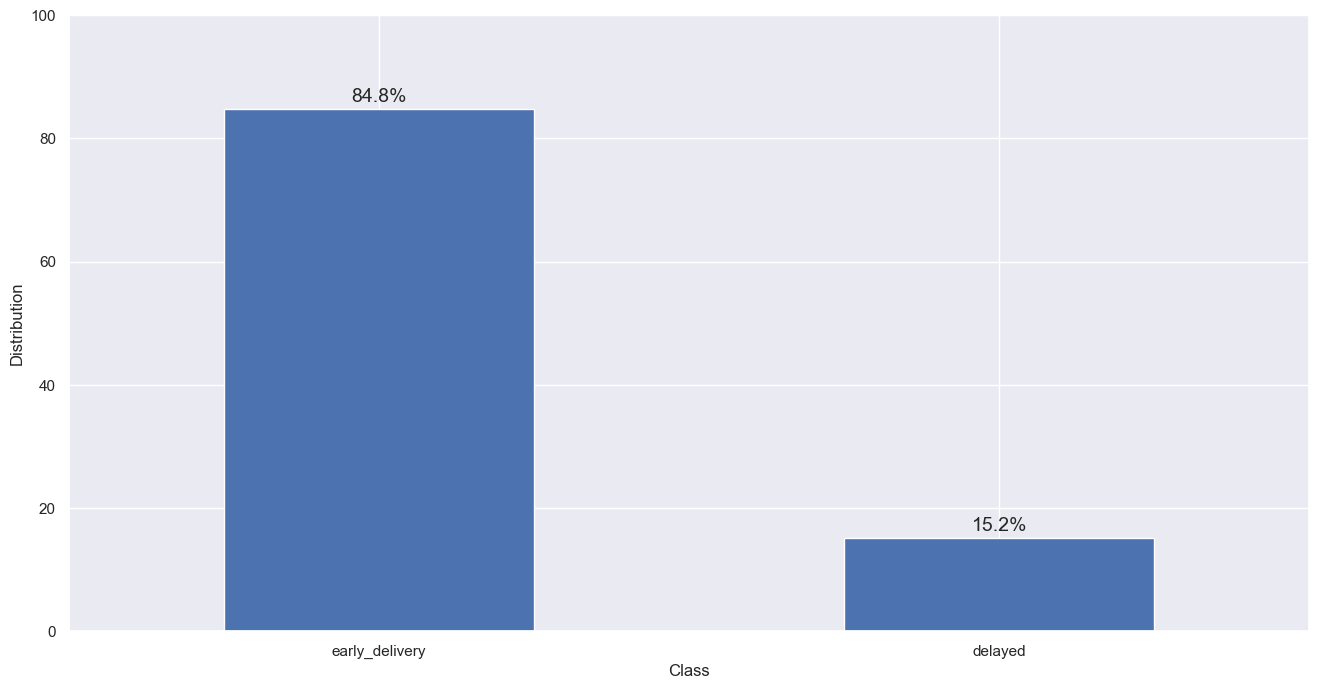

In [10]:
#To check our target variable
ax = df["delivery_status"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
# Add x and y axis titles
ax.set_xlabel("Class")
ax.set_ylabel("Distribution")
ax.set_ylim(0,100)
plt.savefig("Imbalanced.png")

# Remove y axis
#ax.get_yaxis().set_visible(False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   4772 non-null   object 
 1   manager                   4772 non-null   object 
 2   delivery_method           4772 non-null   object 
 3   vendor_terms              4772 non-null   object 
 4   transport_mode            4772 non-null   object 
 5   order_date                4772 non-null   object 
 6   expected_date             4772 non-null   object 
 7   actual_date               4772 non-null   object 
 8   recorded_date             4772 non-null   object 
 9   product_category          4772 non-null   object 
 10  product_type              4772 non-null   object 
 11  supplier                  4772 non-null   object 
 12  product_feature           4772 non-null   object 
 13  product_name              4772 non-null   object 
 14  product_

In [12]:
df.head()

,country,manager,delivery_method,vendor_terms,transport_mode,order_date,expected_date,actual_date,recorded_date,product_category,product_type,supplier,product_feature,product_name,product_brand,dosage,dosage_form,units_per_pack,total_quantity,total_value,pack_price,unit_price,factory_location,priority_status,total_weight,shipping_cost,insurance_cost,delivery_status,shipping_cost_per_weight,item_quantity(%)
0,Vietnam,PMO - US,Direct Drop,EXW,Air,2012-07-25,2012-11-12,2012-11-12,2012-11-12,ARV,Adult,CIPLA LIMITED,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,60,525,3465.0,6.60,0.11,"Cipla, Goa, India",True,34.0,807.47,4.86,early_delivery,23.749118,0.00
1,Kenya,PMO - US,Direct Drop,EXW,Air,2009-11-18,2010-02-16,2010-02-19,2010-02-19,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,150/300mg,Test kit,100,1,80.0,80.00,0.80,Inverness Japan,True,1028.0,10083.69,0.17,delayed,9.809037,0.00
2,Vietnam,PMO - US,Direct Drop,EXW,Air,2013-05-03,2014-01-09,2014-01-09,2014-01-09,ARV,Adult,MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,11092,74871.0,6.75,0.11,Mylan (formerly Matrix) Nashik,True,957.0,1869.41,92.62,early_delivery,1.953406,0.01
3,Zambia,PMO - US,Direct Drop,EXW,Air,2014-08-19,2015-05-12,2015-05-12,2015-05-14,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,30/50/6mg,Test kit,100,6280,502400.0,80.00,0.80,"Alere Medical Co., Ltd.",True,2548.0,28709.52,516.47,early_delivery,11.267473,0.01
4,Haiti,PMO - US,Direct Drop,EXW,Air,2012-01-06,2012-06-12,2012-06-12,2012-06-12,ARV,Pediatric,CIPLA LIMITED,"Lamivudine/Nevirapine/Stavudine 30/50/6mg, dis...",Lamivudine/Nevirapine/Stavudine,Generic,30/50/6mg,Chewable/dispersible tablet - FDC,60,298,685.4,2.30,0.04,"Cipla, Goa, India",True,21.0,304.62,0.96,early_delivery,14.505714,0.00


In [13]:
df['shipping_cost'].value_counts()

0.00        165
9736.10      36
6147.18      27
13398.06     16
25231.96     11
           ... 
3073.74       1
17074.80      1
1075.54       1
7878.43       1
3410.00       1
Name: shipping_cost, Length: 4001, dtype: int64

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['units_per_pack',
 'total_quantity',
 'total_value',
 'pack_price',
 'unit_price',
 'total_weight',
 'shipping_cost',
 'insurance_cost',
 'shipping_cost_per_weight',
 'item_quantity(%)']

In [15]:
from sklearn.preprocessing import MinMaxScaler

def minmax_scale_and_merge(df, numerical_cols):
    scaled_df = df.copy()

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Scale numerical columns
    scaled_values = scaler.fit_transform(df[numerical_cols])

    # Create a DataFrame from the scaled values
    scaled_df[numerical_cols] = scaled_values

    return scaled_df

In [16]:
df = minmax_scale_and_merge(df, numerical_cols)

In [17]:
# Identify the target variable column
target_column = 'delivery_status'

# Identify categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

# Remove the target variable from the categorical columns list
categorical_columns = [col for col in categorical_columns if col != target_column]

# Specify the columns for One-Hot Encoding
one_hot_cols = ['delivery_method', 'transport_mode']

# Specify the columns for Frequency Encoding
frequency_cols = [col for col in categorical_columns if col not in one_hot_cols]

In [18]:
# Separate the target column from the rest of the DataFrame
df_target = df[target_column]  # Store the target column
df_features = df.drop(columns=[target_column])  # DataFrame without the target column

In [19]:
# Initialize the One-Hot Encoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# Apply One-Hot Encoding to the specified columns
one_hot_encoded = one_hot_encoder.fit_transform(df_features[one_hot_cols])

# Convert to DataFrame and add column names
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))

# Concatenate the one-hot encoded columns back to the features DataFrame
df_features = pd.concat([df_features, one_hot_encoded_df], axis=1)

# Remove the original columns that were one-hot encoded
df_features.drop(columns=one_hot_cols, inplace=True)

In [20]:
# Apply Frequency Encoding to the remaining categorical columns
for col in frequency_cols:
    freq_encoding = df_features[col].value_counts(normalize=True)
    df_features[col] = round(df_features[col].map(freq_encoding), 4)

In [21]:
# Concatenate the target column back to the features DataFrame
df_transformed = pd.concat([df_features, df_target], axis=1)

# Display the first few rows of the transformed dataframe
df_transformed.head()

,country,manager,vendor_terms,order_date,expected_date,actual_date,recorded_date,product_category,product_type,supplier,product_feature,product_name,product_brand,dosage,dosage_form,units_per_pack,total_quantity,total_value,pack_price,unit_price,factory_location,priority_status,total_weight,shipping_cost,insurance_cost,shipping_cost_per_weight,item_quantity(%),delivery_method_From RDC,transport_mode_Air Charter,transport_mode_Ocean,transport_mode_Truck,delivery_status
0,0.0687,0.9998,0.3663,0.0036,0.0002,0.0002,0.0002,0.7965,0.6140,0.0268,0.0293,0.0430,0.7125,0.1176,0.3363,0.059059,0.000845,0.000582,0.00528,0.002639,0.0560,True,0.000213,0.002788,0.000694,0.000764,0.000000,0.0,0.0,0.0,0.0,early_delivery
1,0.0145,0.9998,0.3663,0.0025,0.0015,0.0015,0.0015,0.1989,0.1905,0.1077,0.0933,0.0933,0.1085,0.0578,0.1911,0.099099,0.000000,0.000013,0.06400,0.019194,0.0323,True,0.006635,0.034813,0.000024,0.000316,0.000000,0.0,0.0,0.0,0.0,delayed
2,0.0687,0.9998,0.3663,0.0036,0.0002,0.0004,0.0004,0.7965,0.6140,0.0455,0.0503,0.0622,0.7125,0.0578,0.2860,0.059059,0.017889,0.012579,0.00540,0.002639,0.1750,True,0.006177,0.006454,0.013221,0.000063,0.018868,0.0,0.0,0.0,0.0,early_delivery
3,0.0666,0.9998,0.3663,0.0017,0.0008,0.0006,0.0013,0.1989,0.1905,0.1077,0.0933,0.0933,0.1085,0.0027,0.1911,0.099099,0.010127,0.084409,0.06400,0.019194,0.0773,True,0.016456,0.099117,0.073724,0.000362,0.018868,0.0,0.0,0.0,0.0,early_delivery
4,0.0585,0.9998,0.3663,0.0021,0.0008,0.0008,0.0008,0.7965,0.1825,0.0268,0.0023,0.0159,0.7125,0.0027,0.0325,0.059059,0.000479,0.000115,0.00184,0.000960,0.0560,True,0.000129,0.001052,0.000137,0.000467,0.000000,0.0,0.0,0.0,0.0,early_delivery


In [22]:
df = df_transformed

In [23]:
df.shape

(4772, 32)

In [24]:
# Define the dictionary mapping
status_mapping = {'early_delivery': 1, 'delayed': 0}

# Map the  column using the defined dictionary
df["delivery_status"] = df["delivery_status"].map(status_mapping)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     4772 non-null   float64
 1   manager                     4772 non-null   float64
 2   vendor_terms                4772 non-null   float64
 3   order_date                  4772 non-null   float64
 4   expected_date               4772 non-null   float64
 5   actual_date                 4772 non-null   float64
 6   recorded_date               4772 non-null   float64
 7   product_category            4772 non-null   float64
 8   product_type                4772 non-null   float64
 9   supplier                    4772 non-null   float64
 10  product_feature             4772 non-null   float64
 11  product_name                4772 non-null   float64
 12  product_brand               4772 non-null   float64
 13  dosage                      4772 

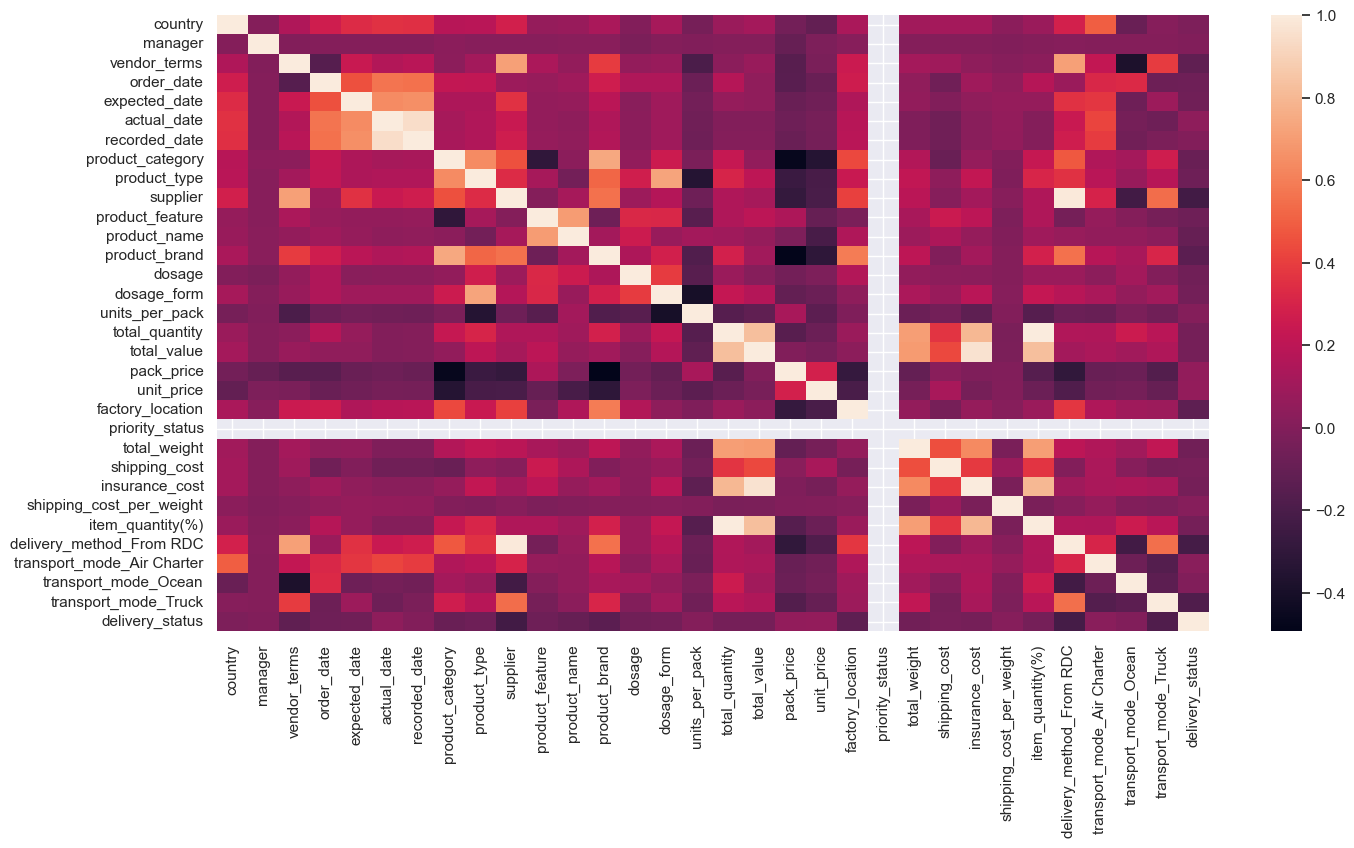

In [26]:
# Checking for multicolinearity amongst columns
corr = df.corr()
sns.heatmap(corr, fmt = '.2f');

In [27]:
df.drop(columns=['expected_date', 'actual_date', 'recorded_date', 'item_quantity(%)', 'priority_status', 'product_feature', 'order_date'], inplace=True)
df.head()

,country,manager,vendor_terms,product_category,product_type,supplier,product_name,product_brand,dosage,dosage_form,units_per_pack,total_quantity,total_value,pack_price,unit_price,factory_location,total_weight,shipping_cost,insurance_cost,shipping_cost_per_weight,delivery_method_From RDC,transport_mode_Air Charter,transport_mode_Ocean,transport_mode_Truck,delivery_status
0,0.0687,0.9998,0.3663,0.7965,0.6140,0.0268,0.0430,0.7125,0.1176,0.3363,0.059059,0.000845,0.000582,0.00528,0.002639,0.0560,0.000213,0.002788,0.000694,0.000764,0.0,0.0,0.0,0.0,1
1,0.0145,0.9998,0.3663,0.1989,0.1905,0.1077,0.0933,0.1085,0.0578,0.1911,0.099099,0.000000,0.000013,0.06400,0.019194,0.0323,0.006635,0.034813,0.000024,0.000316,0.0,0.0,0.0,0.0,0
2,0.0687,0.9998,0.3663,0.7965,0.6140,0.0455,0.0622,0.7125,0.0578,0.2860,0.059059,0.017889,0.012579,0.00540,0.002639,0.1750,0.006177,0.006454,0.013221,0.000063,0.0,0.0,0.0,0.0,1
3,0.0666,0.9998,0.3663,0.1989,0.1905,0.1077,0.0933,0.1085,0.0027,0.1911,0.099099,0.010127,0.084409,0.06400,0.019194,0.0773,0.016456,0.099117,0.073724,0.000362,0.0,0.0,0.0,0.0,1
4,0.0585,0.9998,0.3663,0.7965,0.1825,0.0268,0.0159,0.7125,0.0027,0.0325,0.059059,0.000479,0.000115,0.00184,0.000960,0.0560,0.000129,0.001052,0.000137,0.000467,0.0,0.0,0.0,0.0,1


In [28]:
df.shape

(4772, 25)

In [29]:
# Splitting features and Target
X = df.drop(columns=['delivery_status'], axis='columns') 
y = df['delivery_status']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, stratify=y,  random_state=101)

# Model Training and Evaluation

In [31]:
results = []
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MSE'])

In [32]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_fscore_support, accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,  AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [33]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, manual_threshold):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Evaluation metrics
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    precision, recall, f1_minority, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    # Convert probabilities to binary predictions based on the manual threshold
    y_pred = (y_prob > manual_threshold).astype(int)
    
    # Overall F1-score
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation summary
    print(f"Model: {model_name}")
    print(f"ROC AUC: {roc_auc:.4f}" if y_prob is not None else "ROC AUC: Not available")
    print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print(conf_matrix)

    # Plotting ROC AUC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend()
        plt.savefig(f'{model_name}_roc_curve.png')  
        plt.show()
    
    # Plotting confusion matrix
    # Define custom labels for the confusion matrix
    custom_labels = ['Delayed Delivery', 'Early Delivery']
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False, linewidths=2, linecolor='black', xticklabels=custom_labels, yticklabels=custom_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.savefig(f'{model_name}_confusion_matrix.png')  # Save the confusion matrix as a PNG file
    plt.show()

    # Plotting feature importance (if applicable)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        features = X_train.columns
        
        # Sort features by importance
        sorted_idx = np.argsort(feature_importance)
        
        plt.figure()
        plt.barh(features[sorted_idx], feature_importance[sorted_idx], color='blue')
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance for {model_name}')
        plt.savefig(f'{model_name}_feature_importance.png')
        plt.show()
    
    # Return results in a dictionary
    return {
        'model': model_name,
        'roc_auc': roc_auc,
        'balanced_accuracy': balanced_accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
  }

In [34]:
# from ipywidgets import interact

# def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
#     # Fit the model
#     model.fit(X_train, y_train)
    
#     # Predictions
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
#     # Define evaluation function
#     def evaluate_threshold(threshold=0.5):
#         # Convert probabilities to binary predictions based on the threshold
#         y_pred_threshold = (y_prob > threshold).astype(int)

#         # Calculate evaluation metrics
#         conf_matrix = confusion_matrix(y_test, y_pred_threshold)
#         roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
#         precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_threshold, average='binary')
#         accuracy = accuracy_score(y_test, y_pred_threshold)
#         balanced_accuracy = balanced_accuracy_score(y_test, y_pred_threshold)
        
#         # Print evaluation summary
#         print(f"Model: {model_name}")
#         print(f"Threshold: {threshold:.2f}")
#         print(f"ROC AUC: {roc_auc:.4f}" if y_prob is not None else "ROC AUC: Not available")
#         print(f"Accuracy: {accuracy:.4f}")
#         print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
#         print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
#         print(f"F1-Score: {f1:.4f}")
#         print(classification_report(y_test, y_pred_threshold))

#         # Plotting confusion matrix
#         custom_labels = ['Delayed Delivery', 'Early Delivery']
#         plt.figure(figsize=(6, 4))
#         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=2, linecolor='black', xticklabels=custom_labels, yticklabels=custom_labels)
#         plt.title(f'Confusion Matrix for {model_name}')
#         plt.xlabel('Predicted Class')
#         plt.ylabel('True Class')
#         plt.show()
    
#     # Interactive threshold adjustment
#     interact(evaluate_threshold, threshold=(0.0, 1.0, 0.05))

#     # Return results in a dictionary
#     return {
#         'model': model_name,
#         'roc_auc': roc_auc,
#         'accuracy': accuracy,
#         'balanced_accuracy': balanced_accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1_score': f1,
#         'confusion_matrix': conf_matrix
#     }

Model: Logistic Regression
ROC AUC: 0.7106
Balanced Accuracy: 0.6534
Precision: 0.9219, Recall: 0.5830, F1-Score: 0.7143
              precision    recall  f1-score   support

           0       0.24      0.72      0.36       181
           1       0.92      0.58      0.71      1012

    accuracy                           0.60      1193
   macro avg       0.58      0.65      0.54      1193
weighted avg       0.82      0.60      0.66      1193

[[131  50]
 [422 590]]


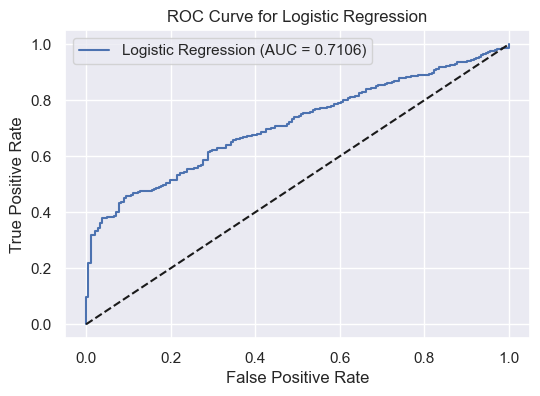

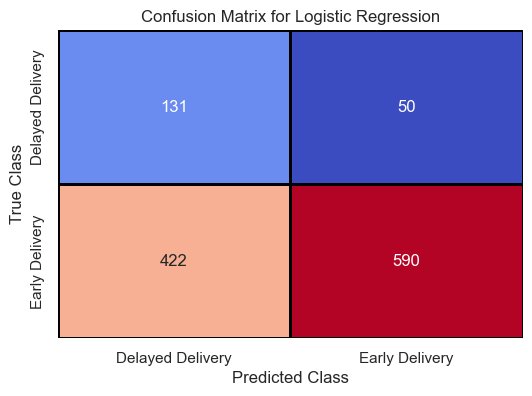

In [35]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_result = evaluate_model(lr_model, 'Logistic Regression', X_train, X_test, y_train, y_test, manual_threshold=0.5)

Model: Random Forest
ROC AUC: 0.7804
Balanced Accuracy: 0.7197
Precision: 0.9578, Recall: 0.5830, F1-Score: 0.7248
              precision    recall  f1-score   support

           0       0.27      0.86      0.41       181
           1       0.96      0.58      0.72      1012

    accuracy                           0.62      1193
   macro avg       0.61      0.72      0.57      1193
weighted avg       0.85      0.62      0.68      1193

[[155  26]
 [422 590]]


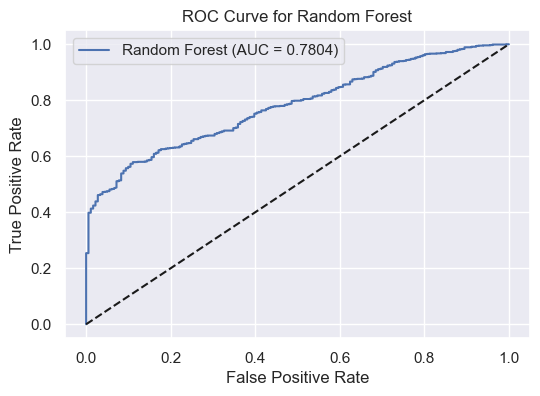

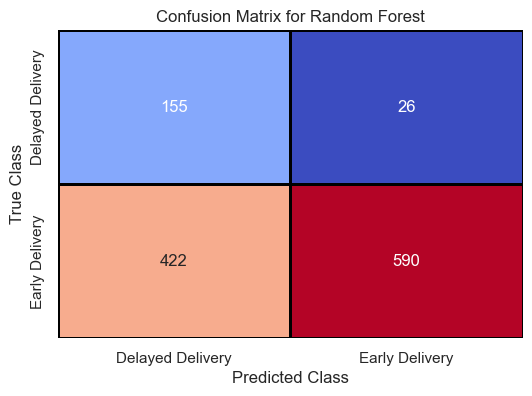

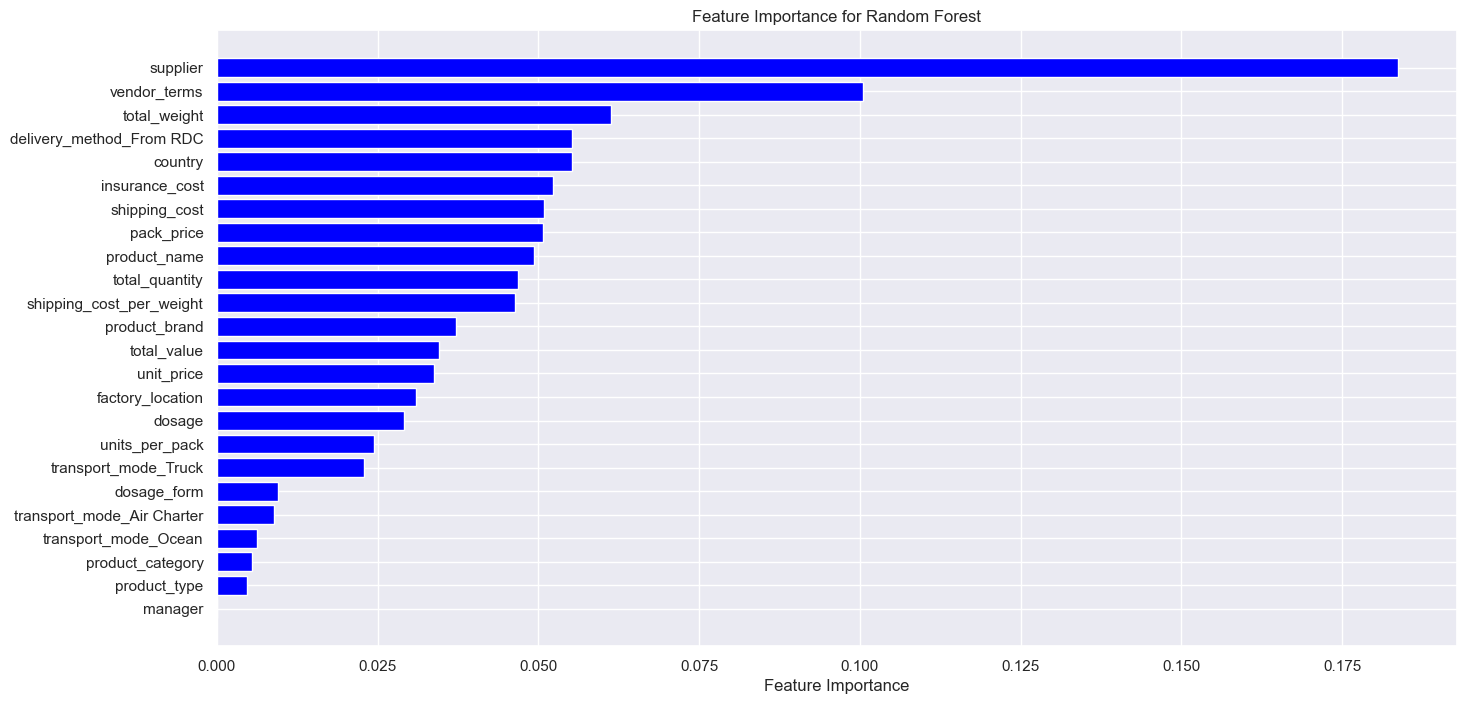

In [36]:
rf_model = RandomForestClassifier(random_state=42, max_depth=6, class_weight='balanced')
rf_result = evaluate_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test, manual_threshold=0.5)

Model: SVM
ROC AUC: 0.7320
Balanced Accuracy: 0.6709
Precision: 0.9353, Recall: 0.5573, F1-Score: 0.7375
              precision    recall  f1-score   support

           0       0.26      0.75      0.38       181
           1       0.93      0.61      0.74      1012

    accuracy                           0.63      1193
   macro avg       0.59      0.68      0.56      1193
weighted avg       0.83      0.63      0.68      1193

[[142  39]
 [448 564]]


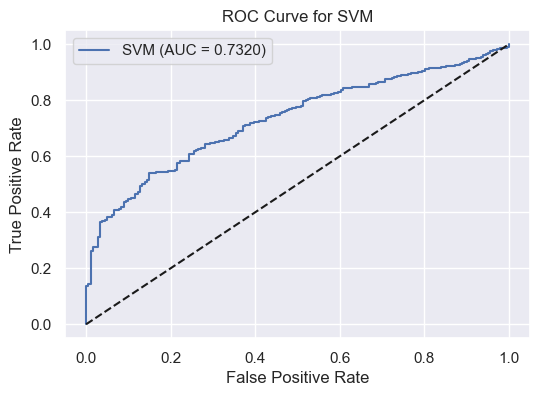

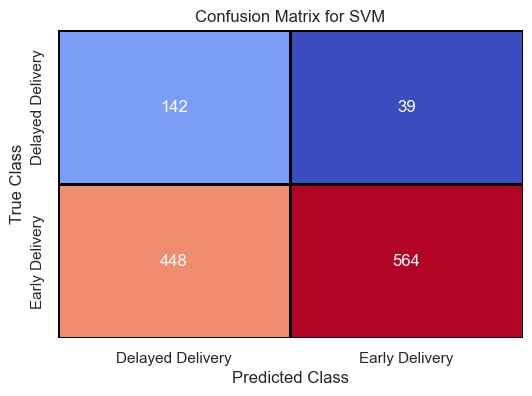

In [37]:
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
svm_result = evaluate_model(svm_model, 'SVM', X_train, X_test, y_train, y_test, manual_threshold=0.75)

Model: XGBoost
ROC AUC: 0.7559
Balanced Accuracy: 0.6250
Precision: 0.8889, Recall: 0.8300, F1-Score: 0.8004
              precision    recall  f1-score   support

           0       0.28      0.61      0.38       181
           1       0.91      0.71      0.80      1012

    accuracy                           0.70      1193
   macro avg       0.59      0.66      0.59      1193
weighted avg       0.82      0.70      0.74      1193

[[ 76 105]
 [172 840]]


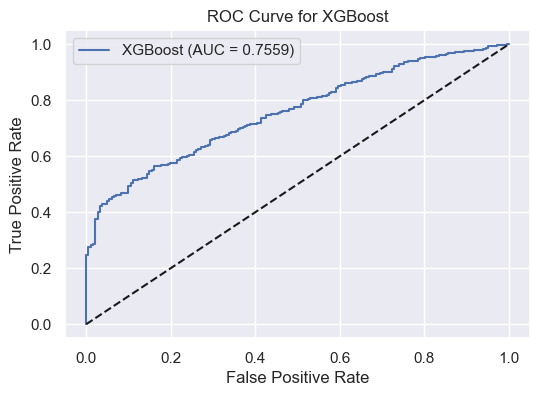

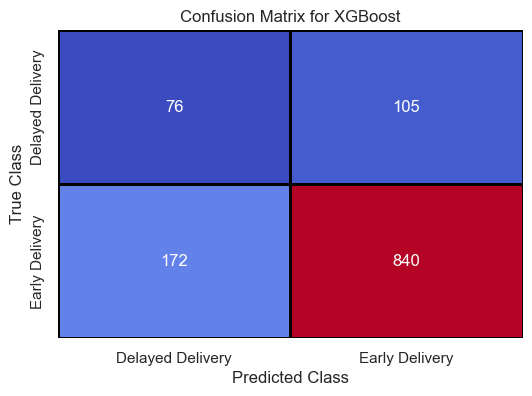

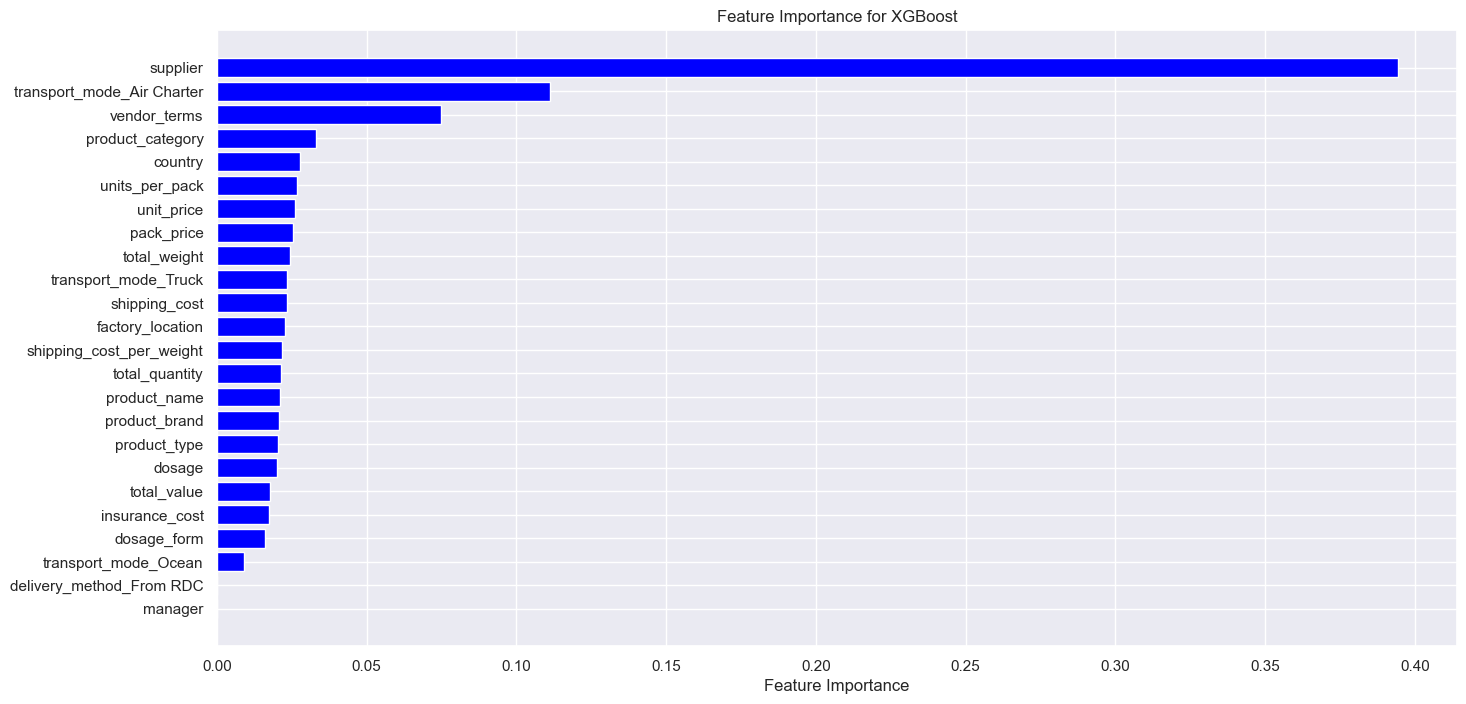

In [38]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_result = evaluate_model(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test, manual_threshold=0.7)

Model: LightGBM
ROC AUC: 0.7594
Balanced Accuracy: 0.6288
Precision: 0.8922, Recall: 0.7935, F1-Score: 0.7203
              precision    recall  f1-score   support

           0       0.26      0.84      0.40       181
           1       0.95      0.58      0.72      1012

    accuracy                           0.62      1193
   macro avg       0.61      0.71      0.56      1193
weighted avg       0.85      0.62      0.67      1193

[[ 84  97]
 [209 803]]


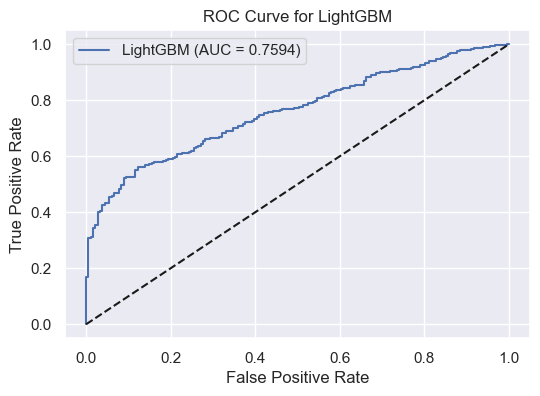

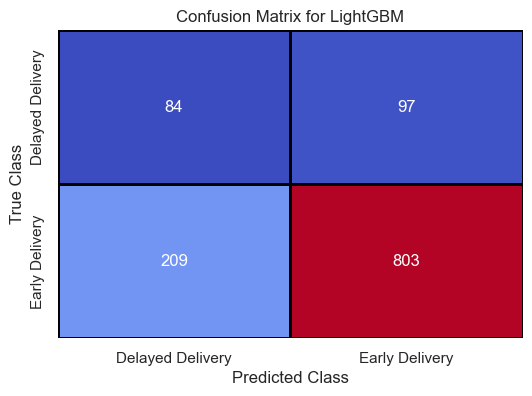

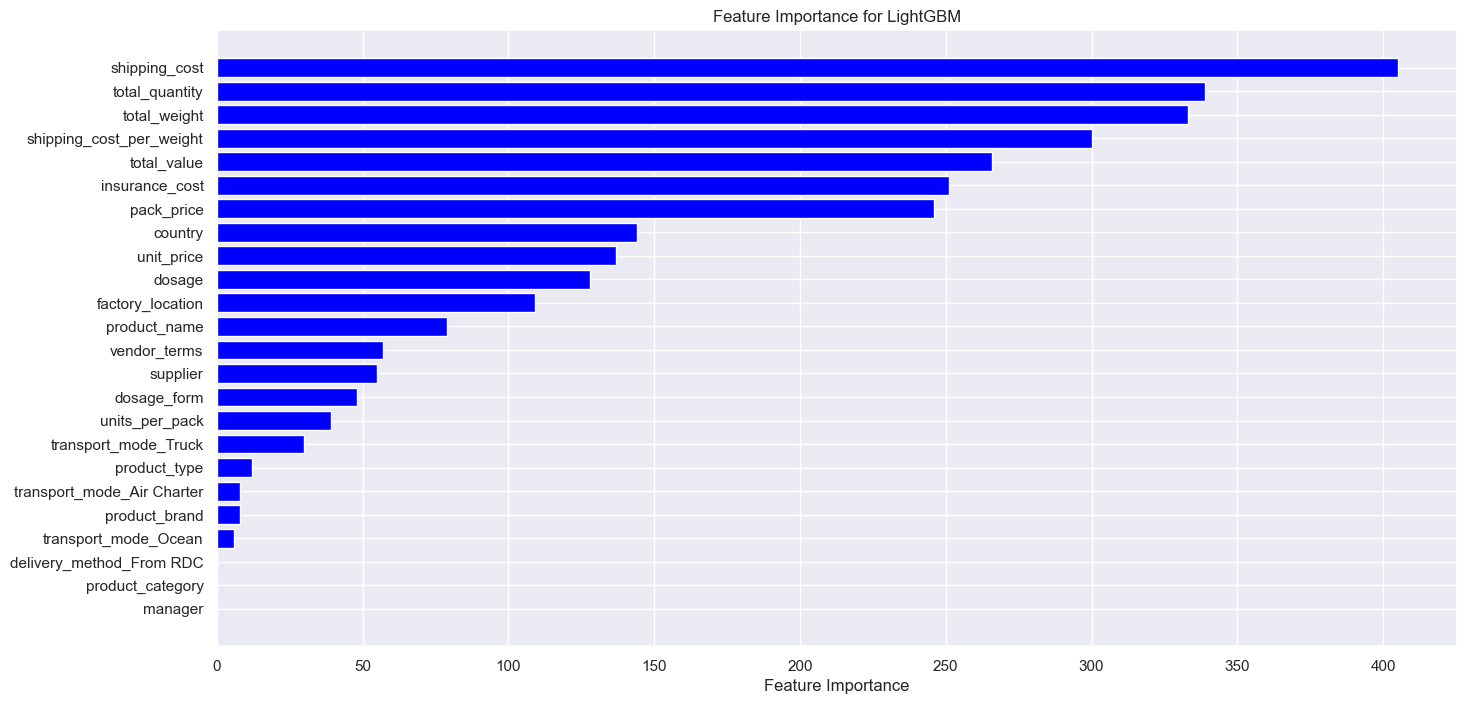

In [39]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(random_state=42, verbose = -1, class_weight='balanced')
lgb_result = evaluate_model(lgb_model, 'LightGBM', X_train, X_test, y_train, y_test, manual_threshold=0.8)

Model: CatBoost
ROC AUC: 0.7702
Balanced Accuracy: 0.6673
Precision: 0.9100, Recall: 0.7490, F1-Score: 0.8217
              precision    recall  f1-score   support

           0       0.29      0.59      0.39       181
           1       0.91      0.75      0.82      1012

    accuracy                           0.72      1193
   macro avg       0.60      0.67      0.61      1193
weighted avg       0.82      0.72      0.76      1193

[[106  75]
 [254 758]]


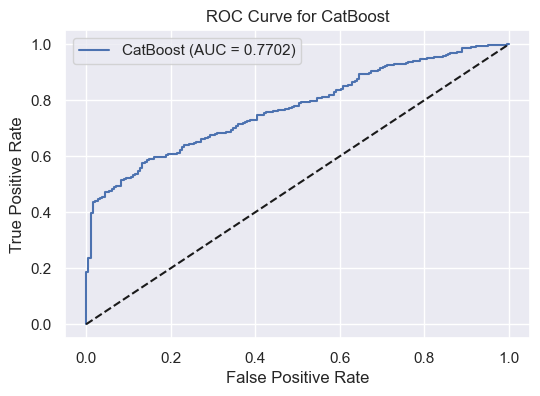

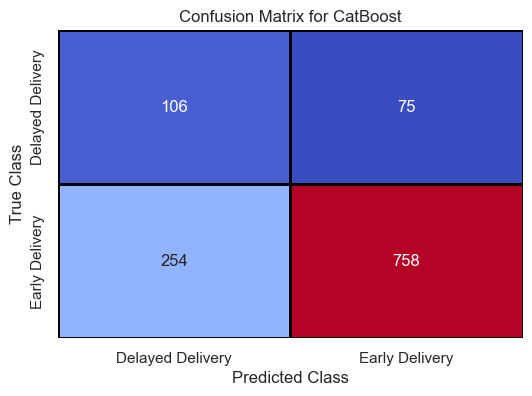

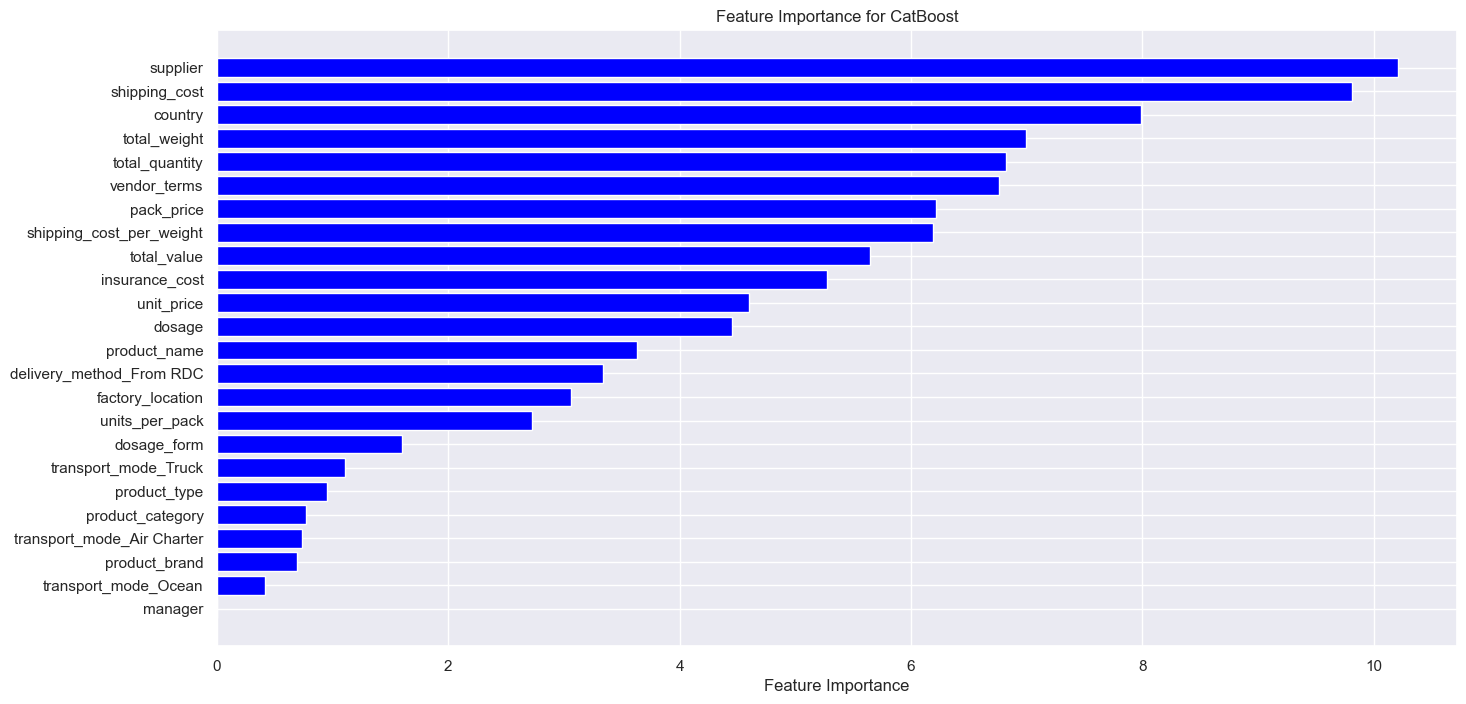

In [40]:
from catboost import CatBoostClassifier

# Calculate class weights based on the proportions in the training set
class_weight = {
    0: len(y_train) / (2 * sum(y_train == 0)),
    1: len(y_train) / (2 * sum(y_train == 1))
}

# Initialize CatBoost model with class weights and other parameters
cb_model = CatBoostClassifier(random_state=42, class_weights=class_weight, verbose=False)

# Evaluate the model using the evaluate_model function
cb_result = evaluate_model(cb_model, 'CatBoost', X_train, X_test, y_train, y_test,  manual_threshold=0.5)

Model: Decision Tree
ROC AUC: 0.7393
Balanced Accuracy: 0.7232
Precision: 0.9824, Recall: 0.4960, F1-Score: 0.6592
              precision    recall  f1-score   support

           0       0.25      0.95      0.40       181
           1       0.98      0.50      0.66      1012

    accuracy                           0.56      1193
   macro avg       0.62      0.72      0.53      1193
weighted avg       0.87      0.56      0.62      1193

[[172   9]
 [510 502]]


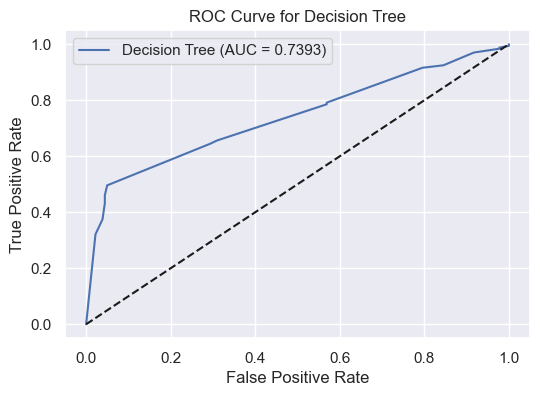

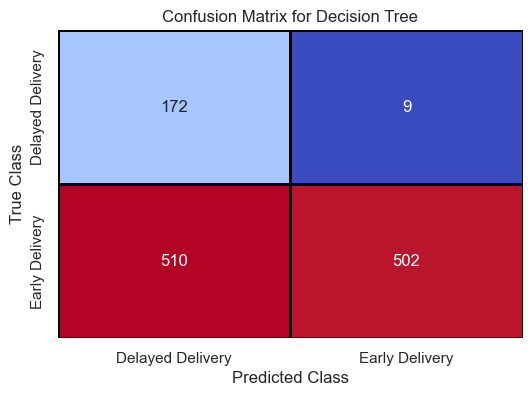

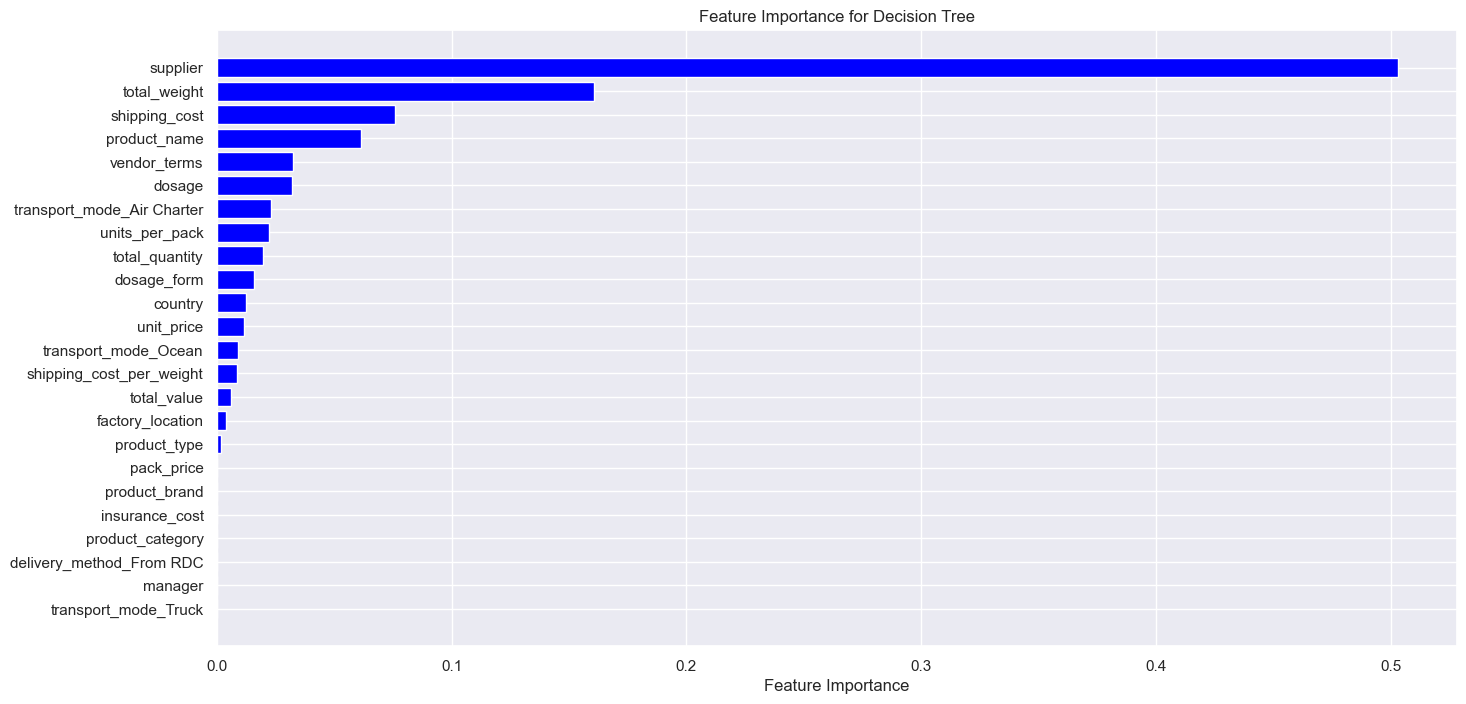

In [41]:
# Initialize the Decision Tree model with class_weight='balanced' to address the class imbalance
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6,  class_weight='balanced')

# Evaluate the model
dt_result = evaluate_model(dt_model, 'Decision Tree', X_train, X_test, y_train, y_test, manual_threshold=0.55)

In [42]:
# Combine the results into a DataFrame
# Collect all results from different models
all_results = [lr_result, rf_result, svm_result, xgb_result, lgb_result, cb_result, dt_result]

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(all_results)

# Display the DataFrame
#print(results_df)
results_df.drop("confusion_matrix", axis =1, inplace=True)
results_df.round(3).sort_values(by='balanced_accuracy', ascending=False)

,model,roc_auc,balanced_accuracy,precision,recall,f1_score
6,Decision Tree,0.739,0.723,0.982,0.496,0.659
1,Random Forest,0.780,0.720,0.958,0.583,0.725
2,SVM,0.732,0.671,0.935,0.557,0.737
5,CatBoost,0.770,0.667,0.910,0.749,0.822
0,Logistic Regression,0.711,0.653,0.922,0.583,0.714
4,LightGBM,0.759,0.629,0.892,0.793,0.720
3,XGBoost,0.756,0.625,0.889,0.830,0.800


# Random Forest

In [43]:
rf_model = RandomForestClassifier(random_state=42, max_depth=6, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Define your threshold value
manual_threshold = 0.5 

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] if hasattr(rf_model, 'predict_proba') else None

# Binarize predictions based on the manual threshold
y_pred_binary = (y_prob > manual_threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print evaluation summary
#print(f"Model: {model_name}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

ROC AUC: 0.7804
Accuracy: 0.6245
Balanced Accuracy: 0.7197
Precision: 0.9578, Recall: 0.5830, F1-Score: 0.7248
              precision    recall  f1-score   support

           0       0.27      0.86      0.41       181
           1       0.96      0.58      0.72      1012

    accuracy                           0.62      1193
   macro avg       0.61      0.72      0.57      1193
weighted avg       0.85      0.62      0.68      1193



Features with importance >= median importance (0.0359):
                     Feature  Importance
7              product_brand    0.037234
19  shipping_cost_per_weight    0.046357
11            total_quantity    0.046893
6               product_name    0.049254
13                pack_price    0.050656
17             shipping_cost    0.050940
18            insurance_cost    0.052332
0                    country    0.055173
20  delivery_method_From RDC    0.055273
16              total_weight    0.061228
2               vendor_terms    0.100465
5                   supplier    0.183633


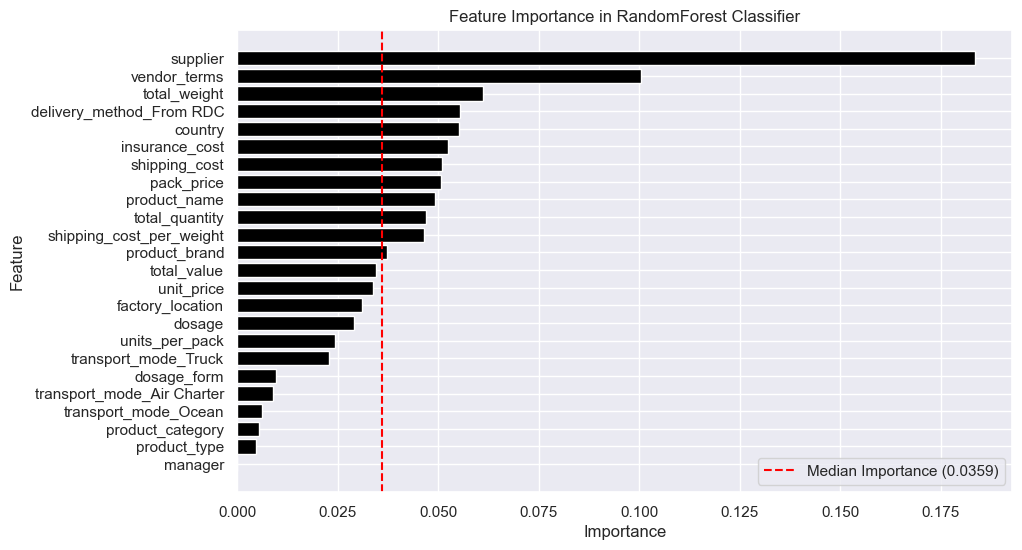

In [44]:
# Calculate the feature importances
importances = rf_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
# Assuming X_train is a pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in RandomForest Classifier")
plt.legend(loc='lower right')
plt.show()


# Support Vector Classifier

In [45]:
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')

svm_model.fit(X_train, y_train)

# Define your threshold value
manual_threshold = 0.75

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1] if hasattr(svm_model, 'predict_proba') else None

# Binarize predictions based on the manual threshold
y_pred_binary = (y_prob > manual_threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print evaluation summary
#print(f"Model: {model_name}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

ROC AUC: 0.7320
Accuracy: 0.5918
Balanced Accuracy: 0.6709
Precision: 0.9353, Recall: 0.5573, F1-Score: 0.6985
              precision    recall  f1-score   support

           0       0.24      0.78      0.37       181
           1       0.94      0.56      0.70      1012

    accuracy                           0.59      1193
   macro avg       0.59      0.67      0.53      1193
weighted avg       0.83      0.59      0.65      1193



Features with importance >= median importance (1.1325):
                     Feature  Importance
8                     dosage    1.376761
4               product_type    1.593246
12               total_value    1.650576
15          factory_location    1.688657
6               product_name    1.913425
18            insurance_cost    2.197616
0                    country    2.485243
23      transport_mode_Truck    2.738219
7              product_brand    3.166899
5                   supplier    4.698775
20  delivery_method_From RDC    5.589595
2               vendor_terms    7.344133


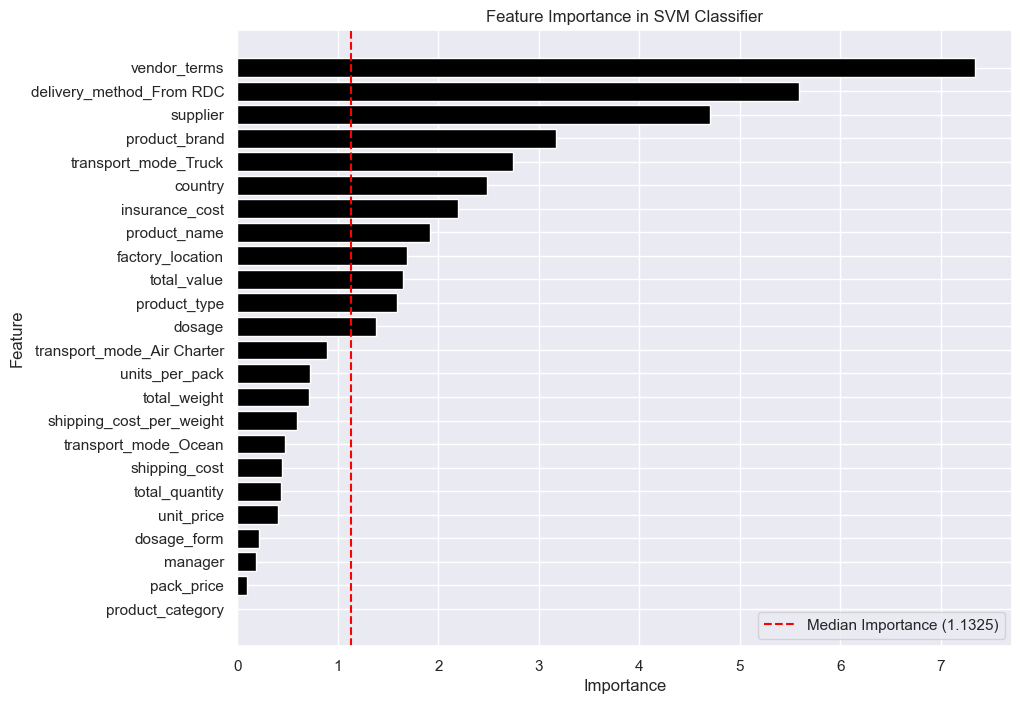

In [46]:
# Get the support vectors and their coefficients
support_vectors = svm_model.support_vectors_
dual_coefficients = svm_model.dual_coef_.ravel()  

# Calculate feature importance based on the absolute dual coefficients of support vectors
feature_importance = np.abs(np.dot(dual_coefficients, support_vectors))

# Calculate the median of the feature importance
median_importance = np.median(feature_importance)

# Get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in SVM Classifier")
plt.legend()

# --------------------------------------------------------------------------------------------------------------

### CatBoost

In [47]:
cb_model = CatBoostClassifier(random_state=42, class_weights=class_weight, verbose=False)

cb_model.fit(X_train, y_train)

# Define your threshold value
manual_threshold = 0.5

# Make predictions on the test set
y_pred = cb_model.predict(X_test)
y_prob = cb_model.predict_proba(X_test)[:, 1] if hasattr(cb_model, 'predict_proba') else None

# Binarize predictions based on the manual threshold
y_pred_binary = (y_prob > manual_threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print evaluation summary
#print(f"Model: {model_name}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

ROC AUC: 0.7702
Accuracy: 0.7242
Balanced Accuracy: 0.6673
Precision: 0.9100, Recall: 0.7490, F1-Score: 0.8217
              precision    recall  f1-score   support

           0       0.29      0.59      0.39       181
           1       0.91      0.75      0.82      1012

    accuracy                           0.72      1193
   macro avg       0.60      0.67      0.61      1193
weighted avg       0.82      0.72      0.76      1193



Features with importance >= median importance (4.0445):
                     Feature  Importance
8                     dosage    4.456110
14                unit_price    4.598424
18            insurance_cost    5.272953
12               total_value    5.644159
19  shipping_cost_per_weight    6.192027
13                pack_price    6.219091
2               vendor_terms    6.758188
11            total_quantity    6.825972
16              total_weight    6.994702
0                    country    7.988513
17             shipping_cost    9.812772
5                   supplier   10.208439


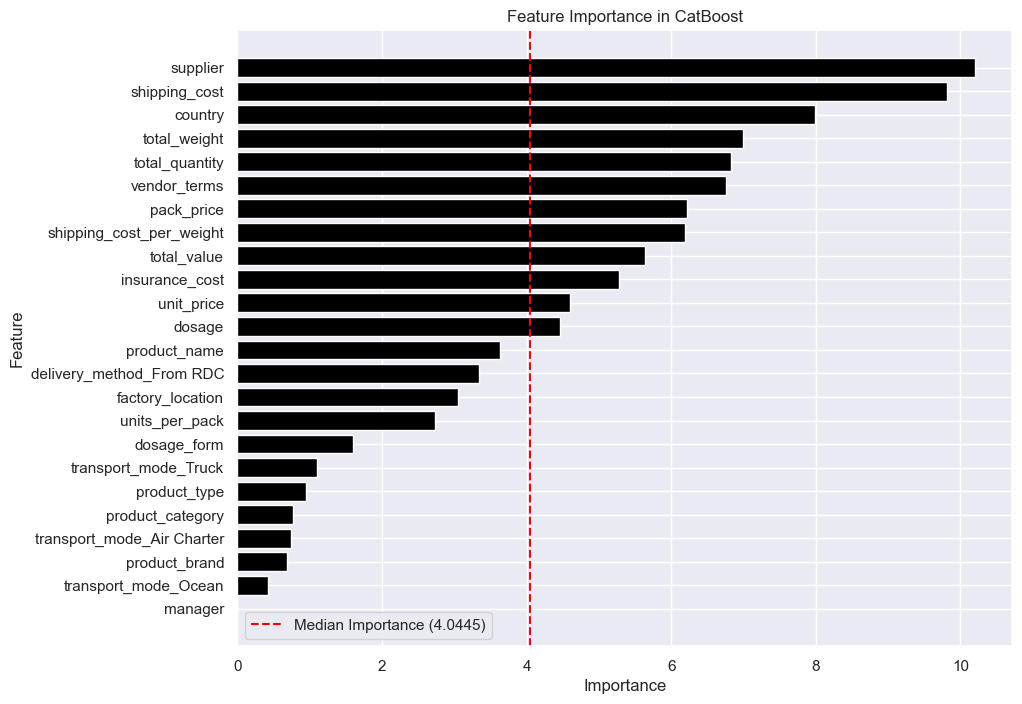

In [48]:
# Calculate the feature importances
importances = cb_model.feature_importances_

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
# Assuming X_train is a pandas DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Filter features with importance greater than or equal to the median
important_features = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

# Print the important features
print(f"Features with importance >= median importance ({median_importance:.4f}):")
print(important_features)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='black')
plt.axvline(median_importance, color='red', linestyle='--', label=f"Median Importance ({median_importance:.4f})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in CatBoost")
plt.legend()
plt.show()

#### Combining Our three top Models

In [49]:
# Calculate feature importances and filter features above median importance
def calculate_important_features(model, X_train):
    # Calculate the feature importances
    importances = model.feature_importances_

    # Calculate the median of the feature importance
    median_importance = np.median(importances)

    # Get the feature names
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns.tolist()
    else:
        feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Filter features with importance greater than or equal to the median
    important_features_df = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

    # Extract the list of important features
    important_features_list = important_features_df['Feature'].tolist()

    return important_features_list

In [50]:
def calculate_important_features_svm(model, X_train):
    # Get the support vectors and their coefficients
    support_vectors = model.support_vectors_
    dual_coefficients = model.dual_coef_.ravel()  # Dual coefficients of the support vectors

    # Calculate feature importance based on the absolute dual coefficients of support vectors
    feature_importance = np.abs(np.dot(dual_coefficients, support_vectors))

    # Calculate the median of the feature importance
    median_importance = np.median(feature_importance)

    # Get the feature names
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns.tolist()
    else:
        feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })

    # Filter features with importance greater than or equal to the median
    important_features_df = feature_importance_df[feature_importance_df['Importance'] >= median_importance]

    # Extract the list of important features
    important_features_list = important_features_df['Feature'].tolist()

    return important_features_list

In [51]:
# Calculate important features for Random Forest, SVM and CatBoosst
rf_important_features = calculate_important_features(rf_model, X_train)
svm_important_features = calculate_important_features_svm(svm_model, X_train)
cb_important_features = calculate_important_features(cb_model, X_train)

# Find common features across the three lists
common_features = set(rf_important_features) & set(svm_important_features) & set(cb_important_features)

# Display the common features
print("Common features across Random Forest, Support Vector Classifier, and CatBoost:")
print(common_features)

Common features across Random Forest, Support Vector Classifier, and CatBoost:
{'insurance_cost', 'supplier', 'country', 'vendor_terms'}


In [52]:
cf = list(common_features)
cf

['insurance_cost', 'supplier', 'country', 'vendor_terms']

In [53]:
X_train

,country,manager,vendor_terms,product_category,product_type,supplier,product_name,product_brand,dosage,dosage_form,units_per_pack,total_quantity,total_value,pack_price,unit_price,factory_location,total_weight,shipping_cost,insurance_cost,shipping_cost_per_weight,delivery_method_From RDC,transport_mode_Air Charter,transport_mode_Ocean,transport_mode_Truck
1991,0.0687,0.9998,0.3663,0.7965,0.6140,0.0159,0.0080,0.7125,0.0069,0.0383,0.059059,0.001082,0.000158,0.001120,0.000480,0.0606,0.000200,0.005873,0.000290,0.001710,0.0,0.0,0.0,0.0
1435,0.0587,0.9998,0.0251,0.7965,0.6140,0.0455,0.0622,0.7125,0.0578,0.2860,0.059059,0.033998,0.031875,0.007200,0.003599,0.1750,0.011080,0.058949,0.053080,0.000320,0.0,0.0,0.0,0.0
4104,0.0985,0.9998,0.4805,0.7965,0.1825,0.4805,0.0189,0.7125,0.0105,0.0325,0.059059,0.023347,0.009607,0.003160,0.001679,0.0052,0.005414,0.029008,0.009607,0.000322,1.0,0.0,0.0,1.0
4214,0.0985,0.9998,0.4805,0.7965,0.6140,0.4805,0.0891,0.7125,0.0962,0.3363,0.059059,0.036745,0.009263,0.001936,0.000960,0.0958,0.008296,0.021631,0.011034,0.000157,1.0,0.0,0.0,1.0
3804,0.0587,0.9998,0.4805,0.7965,0.6140,0.4805,0.0427,0.7125,0.0497,0.2860,0.029029,0.086620,0.041867,0.003712,0.003599,0.0958,0.035948,0.120274,0.044001,0.000201,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,0.0117,0.9998,0.3663,0.1989,0.1905,0.0149,0.0031,0.0149,0.0149,0.1911,0.029029,0.000827,0.002383,0.022080,0.022073,0.0157,0.000349,0.002619,0.002505,0.000444,0.0,0.0,0.0,0.0
986,0.0591,0.9998,0.0618,0.7965,0.6140,0.0935,0.0891,0.7125,0.0962,0.3363,0.059059,0.061934,0.018839,0.002336,0.001200,0.2552,0.029248,0.021991,0.034509,0.000045,0.0,0.0,0.0,0.0
1434,0.0591,0.9998,0.0618,0.7965,0.6140,0.0935,0.0622,0.7125,0.0578,0.2860,0.059059,0.040321,0.035114,0.006688,0.003359,0.2552,0.014692,0.010612,0.064321,0.000043,0.0,0.0,1.0,0.0
1344,0.0224,0.9998,0.0650,0.7965,0.1825,0.0574,0.0723,0.0176,0.0275,0.0545,0.299299,0.000031,0.000204,0.048656,0.004798,0.0220,0.000330,0.003980,0.000214,0.000713,0.0,0.0,0.0,0.0


In [54]:
# Splitting features and Target
X = df[cf] 
y = df['delivery_status']

In [55]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: delivery_status, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y, test_size = 0.3)

In [57]:
# from ipywidgets import interact

# def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
#     # Fit the model
#     model.fit(X_train, y_train)
    
#     # Predictions
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
#     # Define evaluation function
#     def evaluate_threshold(threshold=0.5):
#         # Convert probabilities to binary predictions based on the threshold
#         y_pred_threshold = (y_prob > threshold).astype(int)

#         # Calculate evaluation metrics
#         conf_matrix = confusion_matrix(y_test, y_pred_threshold)
#         roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
#         precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_threshold, average='binary')
#         accuracy = accuracy_score(y_test, y_pred_threshold)
#         balanced_accuracy = balanced_accuracy_score(y_test, y_pred_threshold)
        
#         # Print evaluation summary
#         print(f"Model: {model_name}")
#         print(f"Threshold: {threshold:.2f}")
#         print(f"ROC AUC: {roc_auc:.4f}" if y_prob is not None else "ROC AUC: Not available")
#         print(f"Accuracy: {accuracy:.4f}")
#         print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
#         print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
#         print(f"F1-Score: {f1:.4f}")
#         print(classification_report(y_test, y_pred_threshold))

#         # Plotting confusion matrix
#         custom_labels = ['Delayed Delivery', 'Early Delivery']
#         plt.figure(figsize=(6, 4))
#         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=2, linecolor='black', xticklabels=custom_labels, yticklabels=custom_labels)
#         plt.title(f'Confusion Matrix for {model_name}')
#         plt.xlabel('Predicted Class')
#         plt.ylabel('True Class')
#         plt.show()
    
#     # Interactive threshold adjustment
#     interact(evaluate_threshold, threshold=(0.0, 1.0, 0.05))

#     # Return results in a dictionary
#     return {
#         'model': model_name,
#         'roc_auc': roc_auc,
#         'accuracy': accuracy,
#         'balanced_accuracy': balanced_accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1_score': f1,
#         'confusion_matrix': conf_matrix
#     }

In [58]:
# rf_result = evaluate_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

In [59]:
# svm_result = evaluate_model(svm_model, 'SVM', X_train, X_test, y_train, y_test)

In [60]:
# cb_result = evaluate_model(cb_model, 'CatBoost', X_train, X_test, y_train, y_test)

In [61]:
svm_model = SVC(probability=True, random_state=42, class_weight='balanced')

svm_model.fit(X_train, y_train)

# Define your threshold value
manual_threshold = 0.8

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1] if hasattr(svm_model, 'predict_proba') else None

# Binarize predictions based on the manual threshold
y_pred_binary = (y_prob > manual_threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print evaluation summary
#print(f"Model: {model_name}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))
print(conf_matrix)

ROC AUC: 0.7246
Accuracy: 0.5587
Balanced Accuracy: 0.6945
Precision: 0.9619, Recall: 0.4992, F1-Score: 0.6573
              precision    recall  f1-score   support

           0       0.24      0.89      0.38       218
           1       0.96      0.50      0.66      1214

    accuracy                           0.56      1432
   macro avg       0.60      0.69      0.52      1432
weighted avg       0.85      0.56      0.62      1432

[[194  24]
 [608 606]]


In [62]:
rf_model = RandomForestClassifier(random_state=42, max_depth=6, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Define your threshold value
manual_threshold = 0.5 

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] if hasattr(rf_model, 'predict_proba') else None

# Binarize predictions based on the manual threshold
y_pred_binary = (y_prob > manual_threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print evaluation summary
#print(f"Model: {model_name}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))
print(conf_matrix)

ROC AUC: 0.7634
Accuracy: 0.6522
Balanced Accuracy: 0.7102
Precision: 0.9442, Recall: 0.6269, F1-Score: 0.7535
              precision    recall  f1-score   support

           0       0.28      0.79      0.41       218
           1       0.94      0.63      0.75      1214

    accuracy                           0.65      1432
   macro avg       0.61      0.71      0.58      1432
weighted avg       0.84      0.65      0.70      1432

[[173  45]
 [453 761]]


In [63]:
cb_model = CatBoostClassifier(random_state=42, class_weights=class_weight, verbose=False)

cb_model.fit(X_train, y_train)

# Define your threshold value
manual_threshold = 0.5

# Make predictions on the test set
y_pred = cb_model.predict(X_test)
y_prob = cb_model.predict_proba(X_test)[:, 1] if hasattr(cb_model, 'predict_proba') else None

# Binarize predictions based on the manual threshold
y_pred_binary = (y_prob > manual_threshold).astype(int)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print evaluation summary
#print(f"Model: {model_name}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

ROC AUC: 0.7651
Accuracy: 0.6732
Balanced Accuracy: 0.7000
Precision: 0.9337, Recall: 0.6614, F1-Score: 0.7743
              precision    recall  f1-score   support

           0       0.28      0.74      0.41       218
           1       0.93      0.66      0.77      1214

    accuracy                           0.67      1432
   macro avg       0.61      0.70      0.59      1432
weighted avg       0.83      0.67      0.72      1432



### Hard Voting

In [64]:
# Get predictions (class labels) from each model
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
cb_predictions = cb_model.predict(X_test)

# Combine predictions using majority voting
from scipy.stats import mode
combined_predictions, _ = mode(np.vstack([rf_predictions, svm_predictions, cb_predictions]), axis=0)

# Convert combined predictions to a 1D array
combined_predictions = combined_predictions[0]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, combined_predictions)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, combined_predictions, average='binary')
accuracy = accuracy_score(y_test, combined_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, combined_predictions)

# Print evaluation summary
print(f"Accuracy of the combined model (Majority Voting): {accuracy:.2f}")
print(f"Balanced Accuracy of the combined model (Majority Voting): {balanced_accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
print(classification_report(y_test, combined_predictions))
print(conf_matrix)

Accuracy of the combined model (Majority Voting): 0.65
Balanced Accuracy of the combined model (Majority Voting): 0.71
Precision: 0.95, Recall: 0.62, F1-Score: 0.75
              precision    recall  f1-score   support

           0       0.28      0.80      0.41       218
           1       0.95      0.62      0.75      1214

    accuracy                           0.65      1432
   macro avg       0.61      0.71      0.58      1432
weighted avg       0.84      0.65      0.70      1432

[[174  44]
 [457 757]]


In [65]:
# Data to be tabulated
data = {
    'Metric': ['Balanced Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [balanced_accuracy, precision, recall, f1,]
}

# Creating DataFrame
results_df = pd.DataFrame(data)

# Displaying the DataFrame
results_df

,Metric,Value
0,Balanced Accuracy,0.710862
1,Precision,0.945069
2,Recall,0.623558
3,F1-Score,0.751365


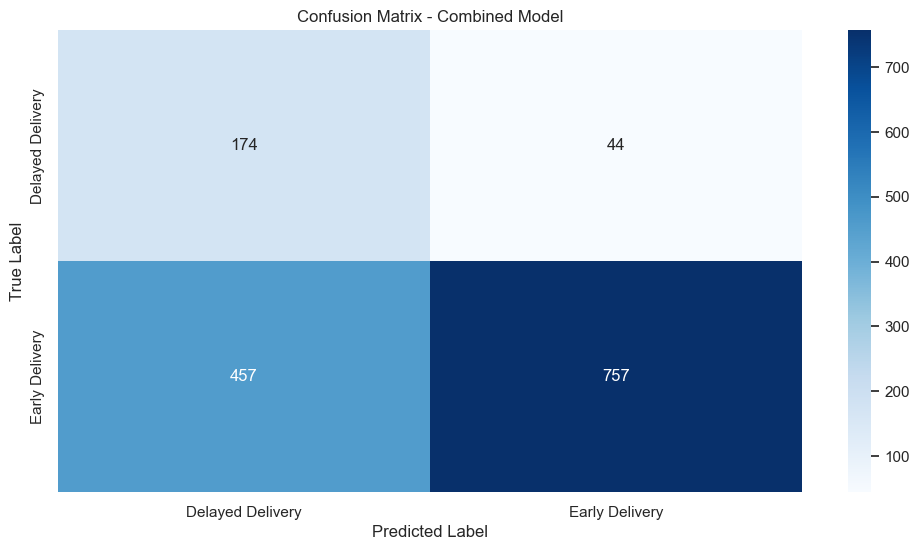

In [66]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, combined_predictions)
custom_labels = ['Delayed Delivery', 'Early Delivery']
# Plot confusion matrix with custom labels
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Combined Model');
plt.savefig("Confusion Matrix - Combined Model.png", dpi=150)

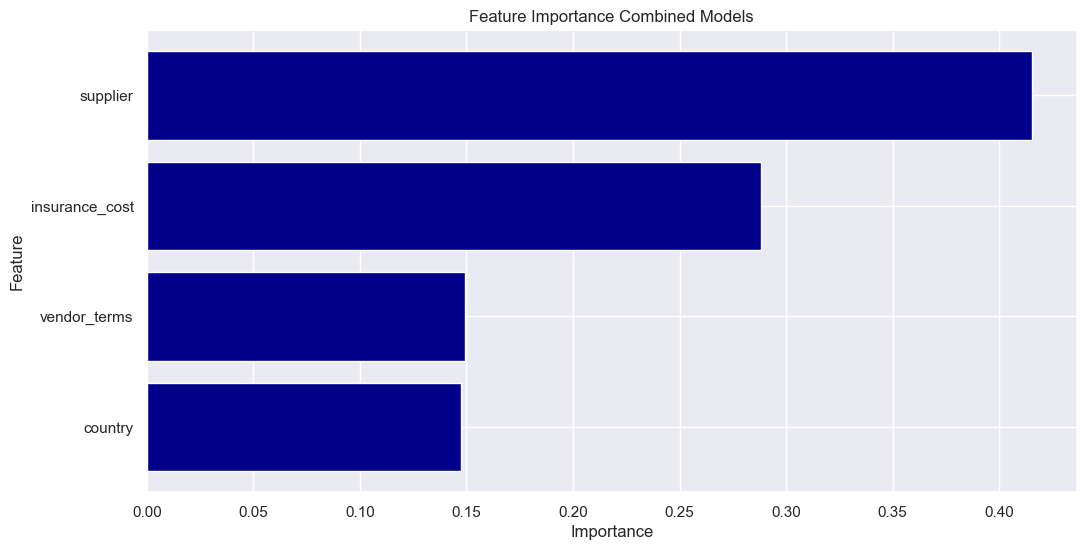

In [67]:
# Get the support vectors and their coefficients
support_vectors = svm_model.support_vectors_
dual_coefficients = svm_model.dual_coef_.ravel()  

# Retrieve feature importance from each model
rf_feature_importance = rf_model.feature_importances_
svm_feature_importance = np.abs(np.dot(dual_coefficients, support_vectors))
cb_feature_importance = cb_model.feature_importances_

# Optionally, normalize the feature importances
rf_feature_importance /= rf_feature_importance.sum()
svm_feature_importance /= svm_feature_importance.sum()
cb_feature_importance /= cb_feature_importance.sum()

# Combine feature importances using averaging
combined_feature_importance = (rf_feature_importance + svm_feature_importance + cb_feature_importance) / 3


# Calculate the feature importances
importances = combined_feature_importance

# Calculate the median of the feature importance
median_importance = np.median(importances)

# Get the feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Combined Models");
plt.savefig("Feature Importance Combined Models.png", dpi=150)

### Soft Voting

In [68]:
# Get predictions (probabilities) from each model
rf_probs = rf_model.predict_proba(X_test)
svm_probs = svm_model.predict_proba(X_test)
cb_probs = cb_model.predict_proba(X_test)

# Average the probabilities
avg_probs = (rf_probs + svm_probs + cb_probs) / 3

# Convert the average probabilities to final predictions
final_predictions = np.argmax(avg_probs, axis=1)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, final_predictions)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, support = precision_recall_fscore_support(y_test, final_predictions, average='binary')
accuracy = accuracy_score(y_test, final_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, final_predictions)

# Print evaluation summary
print(f"Accuracy of the combined model (Soft Voting): {accuracy:.4f}")
print(f"Balanced Accuracy of the combined model (Soft Voting): {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(classification_report(y_test, final_predictions))
print(conf_matrix)

Accuracy of the combined model (Soft Voting): 0.7458
Balanced Accuracy of the combined model (Soft Voting): 0.6356
Precision: 0.8942, Recall: 0.7941, F1-Score: 0.8412
              precision    recall  f1-score   support

           0       0.29      0.48      0.36       218
           1       0.89      0.79      0.84      1214

    accuracy                           0.75      1432
   macro avg       0.59      0.64      0.60      1432
weighted avg       0.80      0.75      0.77      1432

[[104 114]
 [250 964]]


##### 